# Phishing Domain Detection

## Problem Statement :
    Phishing is a type of fraud in which an attacker impersonates a reputable company or 
    person in order to get sensitive information such as login credentials or account 
    information via email or other communication channels. Phishing is popular among 
    attackers because it is easier to persuade someone to click a malicious link that appears 
    to be authentic than it is to break through a computer's protection measures.
    The mail goal is to predict whether the domains are real or malicious.


# Approach : 
    The classical machine learning tasks like Data Exploration, Data Cleaning, 
    Feature Engineering, Model Building and Model Testing. Try out different machine 
    learning algorithms that’s best fit for the above case.

# Procedure :
    Step 1 : Import Libraries and Dataset
    
    Step 2 : Data Pre-processing
            2.1 Handeling Missing Values
            2.2 Presence of Outliers
            
    Step 3 : Exploratory Data Analysis
            3.1 Count of Dependent Variable classes
            3.2 Most Important Features
            3.3 Data Manipulation
            
    Step 4 : Feature Selection
            4.1 Feature Selection using Constant Variance Method
            4.2 Feature Selection using Pearson's Correlation Matrix
            4.3 Feature Selection using Information Gain - Mutual Information
            4.3 Feature Selection using Lasso Regularization
            
    Step 5 : Data Partition
    
    Step 6 : Feature Scaling (Stadardization)
    
    Step 7 : Model Building
            7.1 Logistic Regression
            7.2 Decision Tree
            7.3 Random Forest
            7.4 Gradient Boosting
            7.5 Extreme Boosting
            7.6 Gaussian Naive Bayes
            7.7 K Nearest Neighbour
            7.8 Ridge Classifier
            7.9 Lasso Classifier
            7.10 Support Machine Vector
          
     Step 8 : Choosing Best Model
     
     Step 9 : Pickling the model file for deployment
     
     Step 10 : Conclusion
              

# Step 1 : Import Libraries and Dataset

In [326]:
import warnings
warnings.filterwarnings("ignore")

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns

In [328]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Phishing Domain Detection\dataset_small.csv")
df.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   
4            1               1                  0              4   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                4   
1                    0              0  ...                1                4   
2                    0              0  ...                1                2   
3                    0              0  ...                1                2   
4                    0              0  ...                1                2   

   qty_mx_servers  ttl_hostname  tls_ssl_certificate  qty_redirects  \
0               2          3598                    0              0   
1               1          3977                    1              0   
2               1         10788                    0              0   
3               1         14339                    1              0   
4               1           389                    1              1   

   url_google_index  domain_google_index  url_shortened  phishing  
0                 0                    0              0         0  
1                 0                    0              0         0  
2                 0                    0              0         0  
3                 0                    0              0         1  
4                 0                    0              0         1  

[5 rows x 112 columns]

#### Dataset Description file is added in the repository

# Step 2 : Data Pre-processing

In [329]:
df.shape  

(58645, 112)

##### 58,645 Records and  112 features  are present in the dataset.

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


##### All features are numeric out of which only 1 is float category.

### 2.1 Handeling Missing Values

In [331]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [333]:
missing_value_df.head()

column_name  percent_missing
qty_dot_url                    qty_dot_url              0.0
qty_hyphen_url              qty_hyphen_url              0.0
qty_underline_url        qty_underline_url              0.0
qty_slash_url                qty_slash_url              0.0
qty_questionmark_url  qty_questionmark_url              0.0

In [334]:
missing_value_df[ missing_value_df.percent_missing > 0.0 ]

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []

##### Dataset has no null values.

In [336]:
df.describe().T

count      mean       std  min  25%  50%  75%   max
qty_dot_url           58645.0  2.284338  1.473209  1.0  2.0  2.0  3.0  24.0
qty_hyphen_url        58645.0  0.457123  1.339340  0.0  0.0  0.0  0.0  35.0
qty_underline_url     58645.0  0.171285  0.801919  0.0  0.0  0.0  0.0  21.0
qty_slash_url         58645.0  1.937522  2.037525  0.0  0.0  1.0  3.0  44.0
qty_questionmark_url  58645.0  0.014102  0.138156  0.0  0.0  0.0  0.0   9.0
...                       ...       ...       ...  ...  ...  ...  ...   ...
qty_redirects         58645.0  0.303419  0.815315 -1.0  0.0  0.0  1.0  17.0
url_google_index      58645.0  0.001279  0.037599 -1.0  0.0  0.0  0.0   1.0
domain_google_index   58645.0  0.002234  0.047927 -1.0  0.0  0.0  0.0   1.0
url_shortened         58645.0  0.008287  0.090657  0.0  0.0  0.0  0.0   1.0
phishing              58645.0  0.522585  0.499494  0.0  0.0  1.0  1.0   1.0

[112 rows x 8 columns]

### 2.2 Presence of Outliers 

<AxesSubplot:>

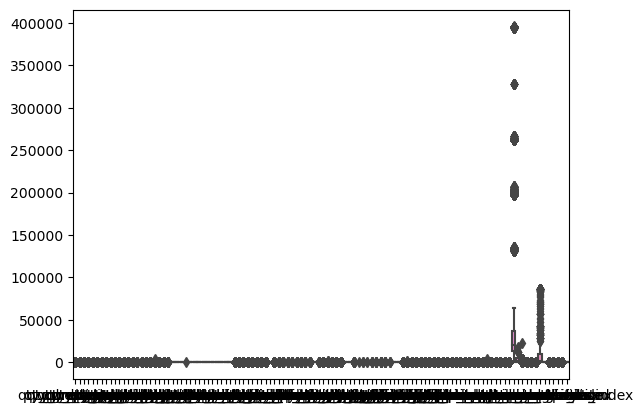

In [252]:
sns.boxplot(data=df)

##### Dataset includes much outliers, we have to treat this outliers otherwise it will affect our model accuray and performance of  model.
##### We have done treatment of outliers in Step 4 : Feature Scaling

# Step 3 : Exploratory Data Analysis

### 3.1 Count of Dependent Variable

In [338]:
import plotly.express as px

fig = px.pie(df,names='phishing',color='phishing',
             color_discrete_map={'1':'purple',
                                 '0':'green'})
fig.show()

##### 52.3 % of sites are malicious or fake out of 58645 records. (approx. 30,647 recored are of malicious site)
##### As dependent varible has 48:51 ratio of class, this dataset is not imbalanced.

### 3.2 Most Important Features

In [340]:
X = df.iloc[:,0:111]  #independent columns
y = df.iloc[:,-1]    #target column i.e phishing

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [341]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.43822278e-02 9.95653670e-03 3.56733284e-03 3.59223748e-02
 1.97536569e-04 1.46259960e-03 5.39571383e-04 1.24979499e-03
 2.66164756e-04 2.08181593e-05 2.20415714e-04 1.16936111e-04
 3.15496459e-04 6.95502861e-05 3.55742122e-06 3.44480160e-05
 1.50454659e-03 2.96144664e-03 2.97924303e-02 2.41852741e-02
 6.83967697e-03 3.01747852e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.06574100e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.25724306e-02 2.51408323e-02 7.57133702e-04 4.19506179e-04
 1.46528542e-02 6.94651506e-03 2.70831043e-03 3.94021836e-02
 4.84896941e-02 1.44262715e-02 2.46777930e-04 1.29359394e-04
 1.36976640e-04 2.84434077e-04 1.35651148e-02 9.24906311e-03
 4.00645328e-03 4.42062763e-05 3.66912357e-02 2.33146889e-05
 8.37675364e-04 2.44599330e-02 1.15511244e-02 3.49109686e-03
 2.26185936e-03 5.58330059e-02 4.91782606e-02 4.04616379e-03
 1.48931617e-02 1.175699

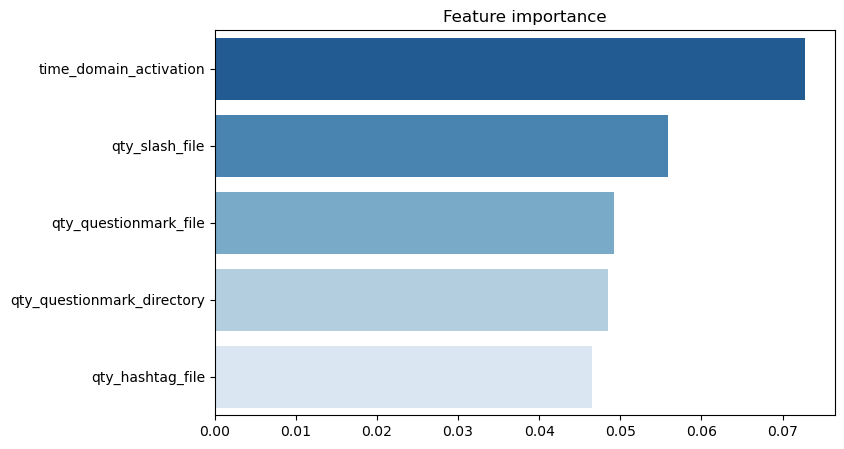

In [342]:
# Plot features importances
import matplotlib.pyplot as plt
imp = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

##### This are the top 5 important feature for prediction.

### 3.3 Data Manipulation
    Data manipulation is the process of changing or altering data in order to make it more readable and organized.

In [343]:
df.directory_length.value_counts(ascending=False)

-1      17507
 1       8767
 7        990
 18       958
 6        941
        ...  
 278        1
 316        1
 301        1
 198        1
 700        1
Name: directory_length, Length: 239, dtype: int64

##### As length can't be negetive, so we will replace negetive value with 0. As it makes more sense.

In [344]:
for i in df.directory_length:
    if i == -1:
        df.directory_length.replace(i,0,inplace=True)

In [ ]:
file_length	time_domain_activation	time_domain_expiration	phishing

In [349]:
df.file_length.value_counts(ascending=False)

 0      19624
-1      17507
 9       4797
 10      2125
 6       1324
        ...  
 500        1
 147        1
 840        1
 91         1
 695        1
Name: file_length, Length: 168, dtype: int64

In [351]:
for i in df.file_length:
    if i == -1:
        df.file_length.replace(i,0,inplace=True)

In [352]:
df.time_domain_activation.value_counts(ascending=False)

-1        18910
 7859       164
 8469       144
 8490       135
 7860       115
          ...  
 4157         1
 3960         1
 3790         1
 10388        1
 2655         1
Name: time_domain_activation, Length: 7776, dtype: int64

##### As time can't be negetive, so we will replace negetive value with 0. As it makes more sense.

In [353]:
for i in df.time_domain_activation:
    if i == -1:
        df.time_domain_activation.replace(i,0,inplace=True)

In [354]:
df.time_domain_expiration.value_counts(ascending=False)

-1       20698
 133       172
 3464      163
 352       153
 281       151
         ...  
 3598        1
 1603        1
 928         1
 2425        1
 2732        1
Name: time_domain_expiration, Length: 2320, dtype: int64

In [355]:
for i in df.time_domain_expiration:
    if i == -1:
        df.time_domain_expiration.replace(i,0,inplace=True)

# Step 4 : Feature Selection

### 4.1 Feature Selection using constant variance method

In [356]:
X_train = df.drop('phishing', axis = 1)
y_train = df[['phishing']]

In [357]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.0) 
var_thres.fit(X_train)

VarianceThreshold()

In [358]:
### Finding non constant features
sum(var_thres.get_support()) 

98

In [359]:
constant_columns = [i for i in X_train.columns
                    if i not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

13


     there are 98 variables are usefull and remaining 13 columns have 0 variance out of 112

In [360]:
for i in constant_columns:
    print(i)

qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain


In [361]:
X_train=X_train.drop(constant_columns,axis=1)

In [362]:
final=pd.concat([X_train,y_train],axis=1)
final.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   
4            1               1                  0              4   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                4   
1                    0              0  ...                1                4   
2                    0              0  ...                1                2   
3                    0              0  ...                1                2   
4                    0              0  ...                1                2   

   qty_mx_servers  ttl_hostname  tls_ssl_certificate  qty_redirects  \
0               2          3598                    0              0   
1               1          3977                    1              0   
2               1         10788                    0              0   
3               1         14339                    1              0   
4               1           389                    1              1   

   url_google_index  domain_google_index  url_shortened  phishing  
0                 0                    0              0         0  
1                 0                    0              0         0  
2                 0                    0              0         0  
3                 0                    0              0         1  
4                 0                    0              0         1  

[5 rows x 99 columns]

### 4.2 Feature Selection using Pearson's Correlation Coeficient

In [363]:
Correlation=final.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if (x < 0.1) & (x > -0.1) else '')

In [364]:
Correlation=final.corr()
Correlation=abs(Correlation.iloc[0:99,97:99])
Correlation.style.applymap(lambda x: 'background-color : yellow' if (x < 0.1) & (x > -0.1) else '')

##### we will drop those features, which has no correlation with dependent variable.
##### we will drop features which has correlation between 0.1 and -0.1 with dependent variable.

In [366]:
final = final.drop(['qty_exclamation_url','qty_space_url','qty_tilde_url','qty_comma_url','qty_plus_url','qty_asterisk_url',
                   'qty_hashtag_url','qty_dollar_url','qty_percent_url','qty_underline_domain','qty_at_domain','domain_length',
                   'domain_in_ip','server_client_domain','time_response','domain_spf','asn_ip','qty_ip_resolved','qty_nameservers',
                   'qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_google_index','domain_google_index',
                   'domain_google_index','url_shortened'],axis=1)

### 4.3 Feature Selection using Information Gain - Mutual Information

In [367]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X_train = final.drop('phishing', axis = 1)
Y_train = final[['phishing']]

In [368]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

# Values always between 0 to 1

array([0.03471543, 0.04426636, 0.02564274, 0.29780647, 0.00799438,
       0.04518998, 0.01982998, 0.02497161, 0.03363071, 0.23936416,
       0.05440641, 0.00290542, 0.02176736, 0.26055315, 0.24361268,
       0.234058  , 0.29487135, 0.23025707, 0.23268156, 0.22949868,
       0.23103843, 0.23107366, 0.22980567, 0.22920039, 0.22895185,
       0.22897721, 0.22956708, 0.22890265, 0.22686859, 0.23157888,
       0.30593331, 0.2558197 , 0.23075498, 0.23123136, 0.22904791,
       0.22896785, 0.22886814, 0.2308413 , 0.22912252, 0.22787624,
       0.22999593, 0.22616959, 0.22906824, 0.23141986, 0.22976067,
       0.23098215, 0.23045805, 0.23288083, 0.12201821, 0.05572094,
       0.05584736, 0.0564777 , 0.05578059, 0.05889883, 0.0527686 ,
       0.06098719, 0.05716725, 0.05365682, 0.05414551, 0.0547402 ,
       0.05648304, 0.05645846, 0.05364955, 0.05246236, 0.05675396,
       0.05911972, 0.05822677, 0.06154617, 0.05667568, 0.01817688,
       0.19619917, 0.06004647])

In [369]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
# Most important feature in descending order

directory_length        0.305933
qty_slash_url           0.297806
qty_slash_directory     0.294871
qty_dot_directory       0.260553
qty_dot_file            0.255820
                          ...   
qty_vowels_domain       0.021767
qty_at_url              0.019830
email_in_url            0.018177
qty_questionmark_url    0.007994
qty_hyphen_domain       0.002905
Length: 72, dtype: float64

<AxesSubplot:>

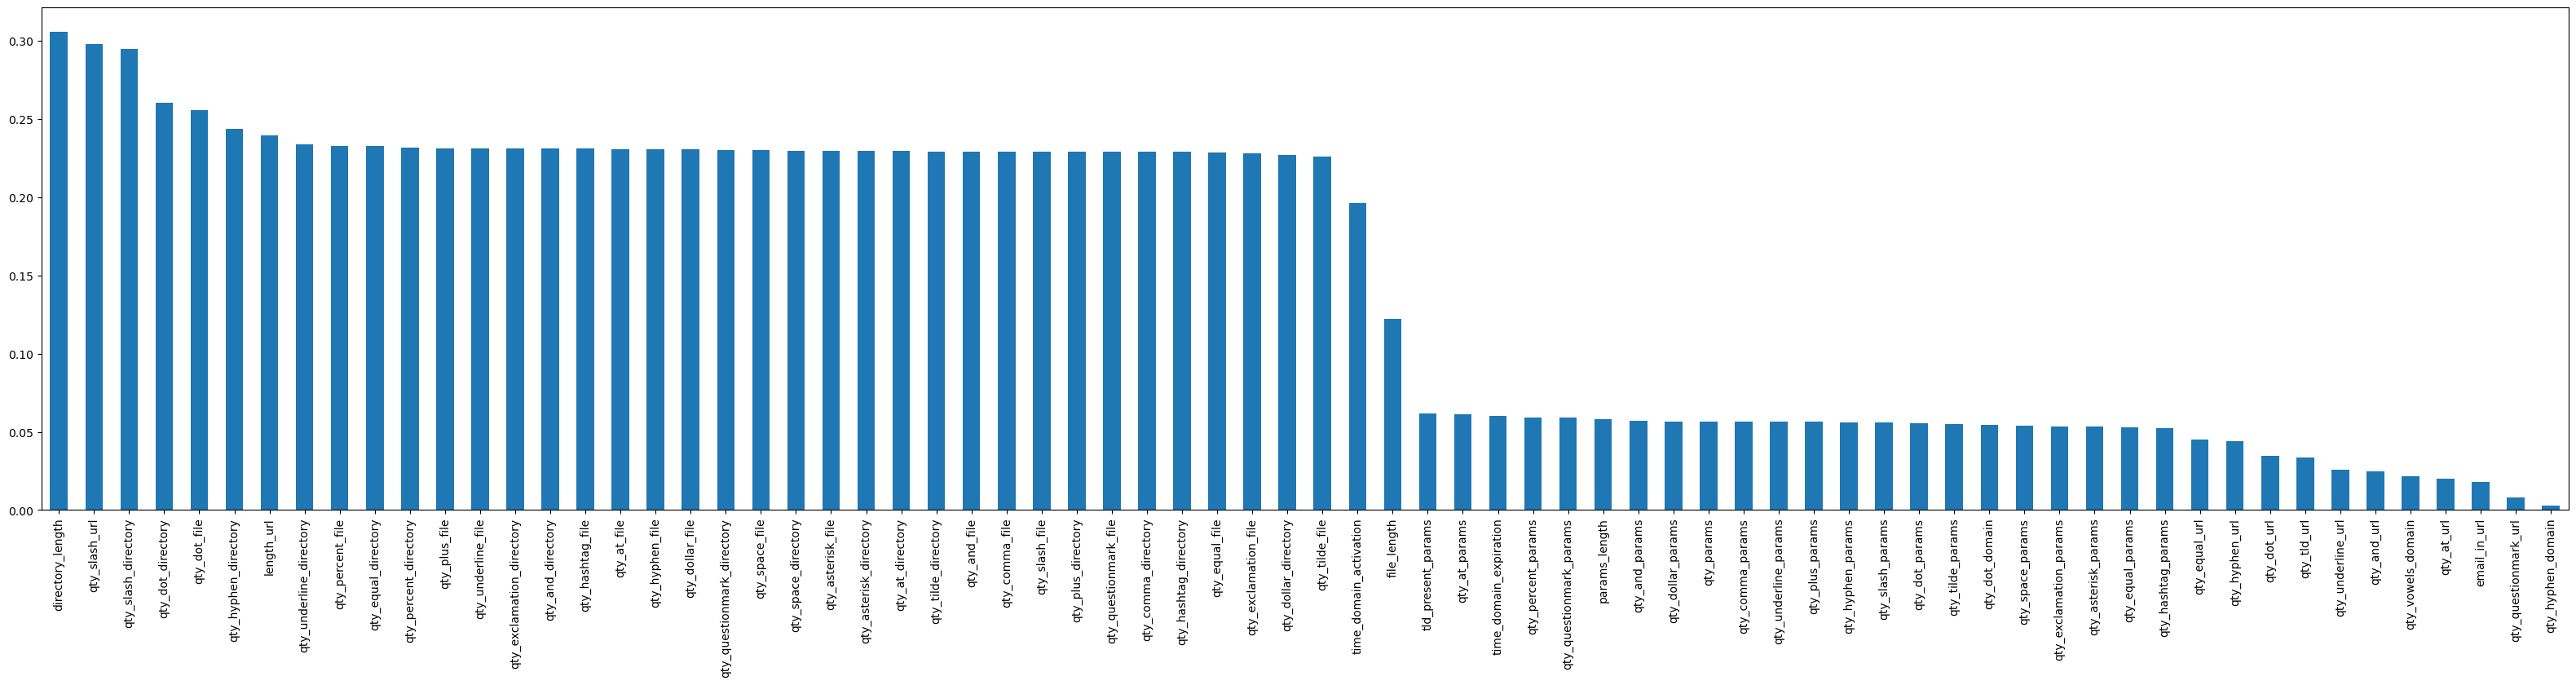

In [370]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(40, 8))

### 4.4 Feature Selection using Lasso Regularization

In [371]:
from sklearn.linear_model import LassoCV

In [372]:
Lasso_mod = LassoCV()  #Alpha = Lambda

In [373]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X_train = final.drop('phishing', axis = 1)
Y_train = final[['phishing']]
# Split X and y into X_
model=Lasso_mod.fit(X_train, y_train)

In [374]:
model.alpha_  # Lambda value 

0.518777754776806

In [375]:
model.intercept_ # Beta0

0.5208145408497155

In [376]:
model.coef_  # Beta1, Beta2 , Beta3

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.55725741e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.76854266e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.05598542e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [377]:
coef2 = pd.DataFrame(list(model.coef_.ravel()),list(model.feature_names_in_)).reset_index()
coef2.columns = ['Variable', 'coefficient']
coef2 = coef2.sort_values(by='coefficient', ascending=False)
coef2.head(7)

Variable  coefficient
30      directory_length     0.004769
9             length_url     0.001557
44     qty_asterisk_file     0.000000
51  qty_underline_params     0.000000
50     qty_hyphen_params     0.000000
49        qty_dot_params     0.000000
47      qty_percent_file     0.000000

In [378]:
imp_coef = coef2[coef2.coefficient != 0]
imp_coef

Variable  coefficient
30        directory_length     0.004769
9               length_url     0.001557
71  time_domain_expiration    -0.000004
70  time_domain_activation    -0.000057
48             file_length    -0.000906

In [379]:
coef2 = coef2[coef2.coefficient == 0]

In [380]:
list1 = list(coef2.iloc[:,0])

In [381]:
list1

['qty_asterisk_file',
 'qty_underline_params',
 'qty_hyphen_params',
 'qty_dot_params',
 'qty_percent_file',
 'qty_dollar_file',
 'qty_hashtag_file',
 'qty_dot_url',
 'qty_questionmark_params',
 'qty_plus_file',
 'qty_comma_file',
 'qty_tilde_file',
 'qty_space_file',
 'qty_exclamation_file',
 'qty_and_file',
 'qty_slash_params',
 'qty_equal_params',
 'qty_hyphen_url',
 'qty_hashtag_params',
 'email_in_url',
 'qty_params',
 'tld_present_params',
 'params_length',
 'qty_percent_params',
 'qty_dollar_params',
 'qty_asterisk_params',
 'qty_at_params',
 'qty_plus_params',
 'qty_comma_params',
 'qty_tilde_params',
 'qty_space_params',
 'qty_exclamation_params',
 'qty_and_params',
 'qty_at_file',
 'qty_equal_file',
 'qty_questionmark_file',
 'qty_dot_domain',
 'qty_slash_directory',
 'qty_underline_directory',
 'qty_hyphen_directory',
 'qty_dot_directory',
 'qty_vowels_domain',
 'qty_hyphen_domain',
 'qty_tld_url',
 'qty_slash_file',
 'qty_and_url',
 'qty_at_url',
 'qty_equal_url',
 'qty_que

In [382]:
final = final.drop(['qty_space_file','qty_tilde_file','qty_comma_file','qty_exclamation_file','qty_plus_file','qty_asterisk_file',
                    'qty_questionmark_params','qty_hashtag_file','qty_dollar_file','qty_percent_file','qty_dot_params',
                    'qty_hyphen_params','qty_underline_params','qty_slash_params','qty_equal_params','qty_at_file',
                    'qty_hashtag_params','email_in_url','qty_params','tld_present_params','params_length','qty_percent_params',
                    'qty_dollar_params','qty_asterisk_params','qty_at_params','qty_plus_params','qty_comma_params',
                    'qty_tilde_params','qty_space_params','qty_exclamation_params','qty_and_params','qty_and_file','qty_dot_url',
                    'qty_hyphen_url','qty_dot_domain','qty_slash_directory','qty_underline_directory','qty_hyphen_directory',
                    'qty_dot_directory','qty_vowels_domain','qty_hyphen_domain','qty_tld_url','qty_questionmark_file',
                    'qty_and_url','qty_at_url','qty_equal_url','qty_questionmark_url','qty_slash_url','qty_underline_url',
                    'qty_questionmark_directory','qty_equal_directory','qty_at_directory','qty_and_directory','qty_slash_file',
                    'qty_underline_file','qty_hyphen_file','qty_dot_file','qty_percent_directory','qty_dollar_directory',
                    'qty_hashtag_directory','qty_asterisk_directory','qty_plus_directory','qty_comma_directory',
                    'qty_tilde_directory','qty_space_directory','qty_exclamation_directory','qty_equal_file'], axis=1)

In [285]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   length_url              58645 non-null  int64
 1   directory_length        58645 non-null  int64
 2   file_length             58645 non-null  int64
 3   time_domain_activation  58645 non-null  int64
 4   time_domain_expiration  58645 non-null  int64
 5   phishing                58645 non-null  int64
dtypes: int64(6)
memory usage: 2.7 MB


In [286]:
final.head()

length_url  directory_length  file_length  time_domain_activation  \
0          14                -1           -1                    4927   
1          38                 6            0                    8217   
2          24                 1            0                     258   
3          38                13            0                    2602   
4          46                27            0                      -1   

   time_domain_expiration  phishing  
0                     185         0  
1                      -1         0  
2                     106         0  
3                     319         1  
4                      -1         1

# Step 5 : Data Partition

In [383]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = final.drop('phishing', axis = 1)
Y = final[['phishing']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=986)

##### We splitted the data into 70:30 ratio. 70% Data will use for training model and 30% data will use for testing model. 

# Step 6 : Feature Scaling

In [385]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

In [386]:
X_train_1.mean(axis=0)

array([ 9.73618886e-19,  6.66388037e-18,  9.15201753e-18, -9.66046295e-18,
        1.47990071e-17])

In [387]:
X_train_1.std(axis=0)

array([1., 1., 1., 1., 1.])

In [388]:
X_train_1

array([[-5.32370083e-01, -3.94683673e-01,  2.90507686e-03,
        -9.05369424e-01, -5.20186513e-01],
       [-3.73385220e-01, -6.05636473e-01, -2.97186292e-01,
        -5.19598497e-01, -4.95420871e-01],
       [ 1.41077824e+00,  3.36730792e+00,  3.78405633e+00,
         1.52713059e+00,  1.00113149e+00],
       ...,
       [-5.54154932e-02,  9.75395262e-02,  8.43160910e-01,
        -6.42116486e-01,  1.11337357e-01],
       [-4.44045159e-01, -5.70477673e-01, -2.97186292e-01,
        -9.00725885e-01,  1.00723510e-01],
       [-6.56024976e-01, -5.70477673e-01, -2.97186292e-01,
         2.36046723e+00,  4.62399111e+00]])

In [389]:
numeric_predictors_1=list(final.columns[:5])
X_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
X_train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  
0               -0.520187  
1               -0.495421  
2                1.001131  
3               -0.010722  
4               -0.520187

In [390]:
y_train.reset_index(drop=True, inplace=True)

In [391]:
numeric_predictors_1=list(final.columns[:5])
X_test=pd.DataFrame(X_test_1,columns=numeric_predictors_1)
X_test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  
0                0.067113  
1                0.261700  
2               -0.104478  
3               -0.329137  
4                0.014044

In [392]:
y_test.reset_index(drop=True, inplace=True)

# Step 7 : Model Building

## 7.1 Logistic Regression

In [393]:
from sklearn.linear_model import LogisticRegression  #Linear model include all the regression models
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [394]:
output.intercept_  # beta 0

array([0.74678324])

In [395]:
output.coef_  # Beta 1, Beta 2.... 

array([[ 1.81308026,  2.42218305, -1.08145402, -0.94797532, -0.01973994]])

In [396]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=output.predict(X_train)  # answer in terms of probability
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          0  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          1  
4               -0.520187         1          1

In [397]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['phishing'])
matrix

array([[17348,  4517],
       [ 2238, 16948]], dtype=int64)

In [398]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     19586
           1       0.88      0.79      0.83     21465

    accuracy                           0.84     41051
   macro avg       0.84      0.84      0.84     41051
weighted avg       0.84      0.84      0.84     41051



In [399]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=output.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          0

In [400]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['phishing'])
print(matrix)

[[7417 1947]
 [ 995 7235]]


In [401]:
from sklearn.metrics import classification_report
print(classification_report(test['phishing'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      8412
           1       0.88      0.79      0.83      9182

    accuracy                           0.83     17594
   macro avg       0.84      0.83      0.83     17594
weighted avg       0.84      0.83      0.83     17594



## 7.2 Decision Tree

In [403]:
train=pd.concat([y_train,X_train],axis=1)

In [404]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [405]:
independent_variable = list(train.columns[1:])
independent_variable

['length_url',
 'directory_length',
 'file_length',
 'time_domain_activation',
 'time_domain_expiration']

In [406]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter   # bydefault gini is assigned if not mentioned.
                                 min_samples_leaf=5000, ## child
                                 min_samples_split=600, #parent 
                                 max_depth=10)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5000,
                       min_samples_split=600)

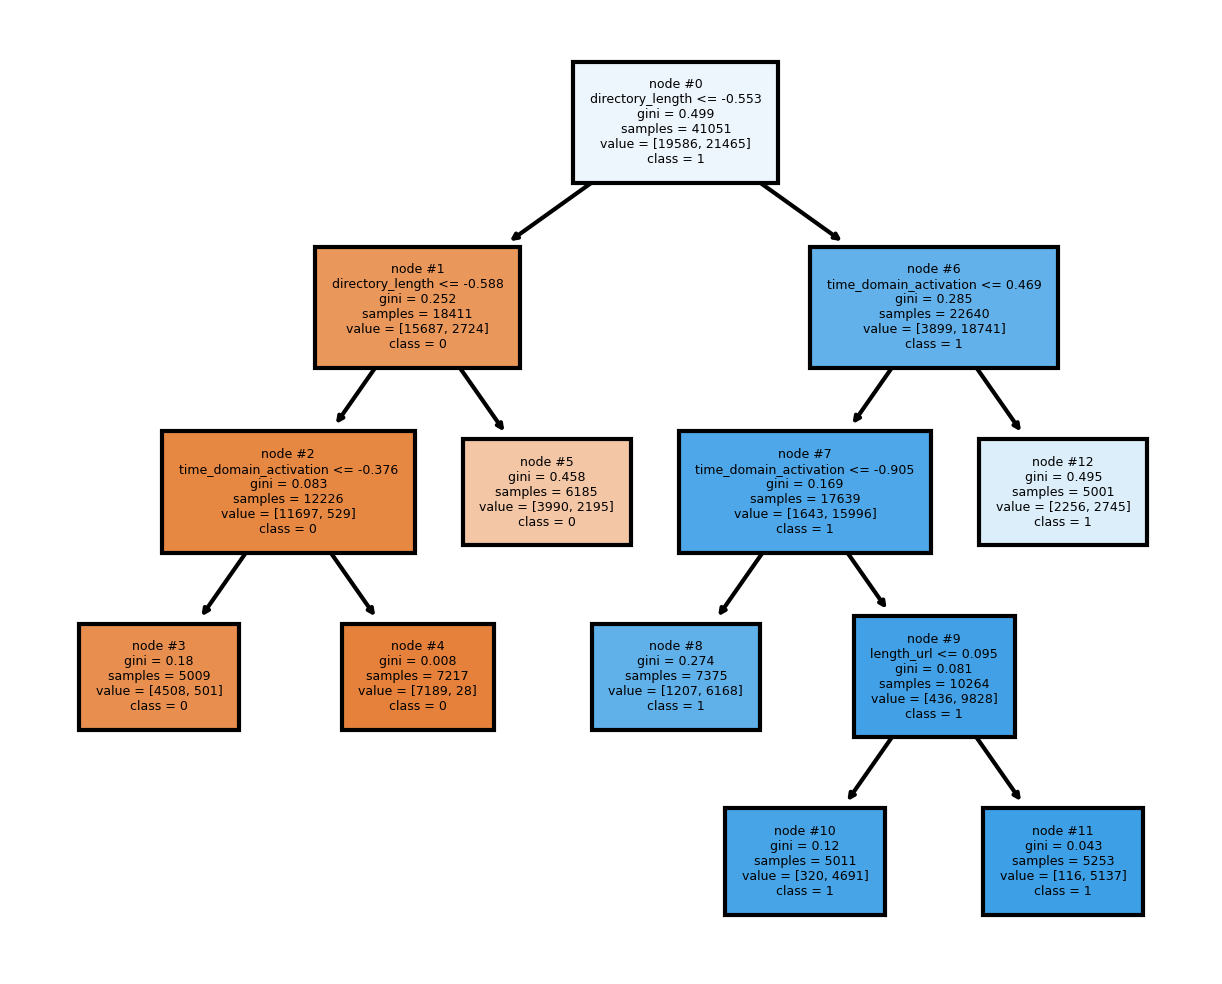

In [407]:
from sklearn import tree
import matplotlib.pyplot as plt

phishing=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=phishing, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [408]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

phishing  length_url  directory_length  file_length  \
0         1   -0.532370         -0.394684     0.002905   
1         0   -0.373385         -0.605636    -0.297186   
2         1    1.410778          3.367308     3.784056   
3         0    0.562859          1.398415     1.683417   
4         1    0.686514         -0.465001    -0.297186   

   time_domain_activation  time_domain_expiration  Predicted  
0               -0.905369               -0.520187          1  
1               -0.519598               -0.495421          0  
2                1.527131                1.001131          1  
3                0.426255               -0.010722          1  
4               -0.905369               -0.520187          1

In [409]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['phishing'])
print(matrix)

[[15687  2724]
 [ 3899 18741]]


In [410]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     19586
           1       0.83      0.87      0.85     21465

    accuracy                           0.84     41051
   macro avg       0.84      0.84      0.84     41051
weighted avg       0.84      0.84      0.84     41051



In [411]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=dt.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          0

In [412]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['phishing'])
print(confusion_matrix)

[[6721 1142]
 [1691 8040]]


In [413]:
from sklearn.metrics import classification_report
print(classification_report(test['phishing'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      8412
           1       0.83      0.88      0.85      9182

    accuracy                           0.84     17594
   macro avg       0.84      0.84      0.84     17594
weighted avg       0.84      0.84      0.84     17594



## 7.3 Random Forest

In [414]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=50, # make 20 tress
                               criterion="gini",
                               max_depth=15,  # each tree will have 4 branches
                               min_samples_split=7000,# each tree will have parent node
                               min_samples_leaf=900,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=900,
                       min_samples_split=7000, n_estimators=50)

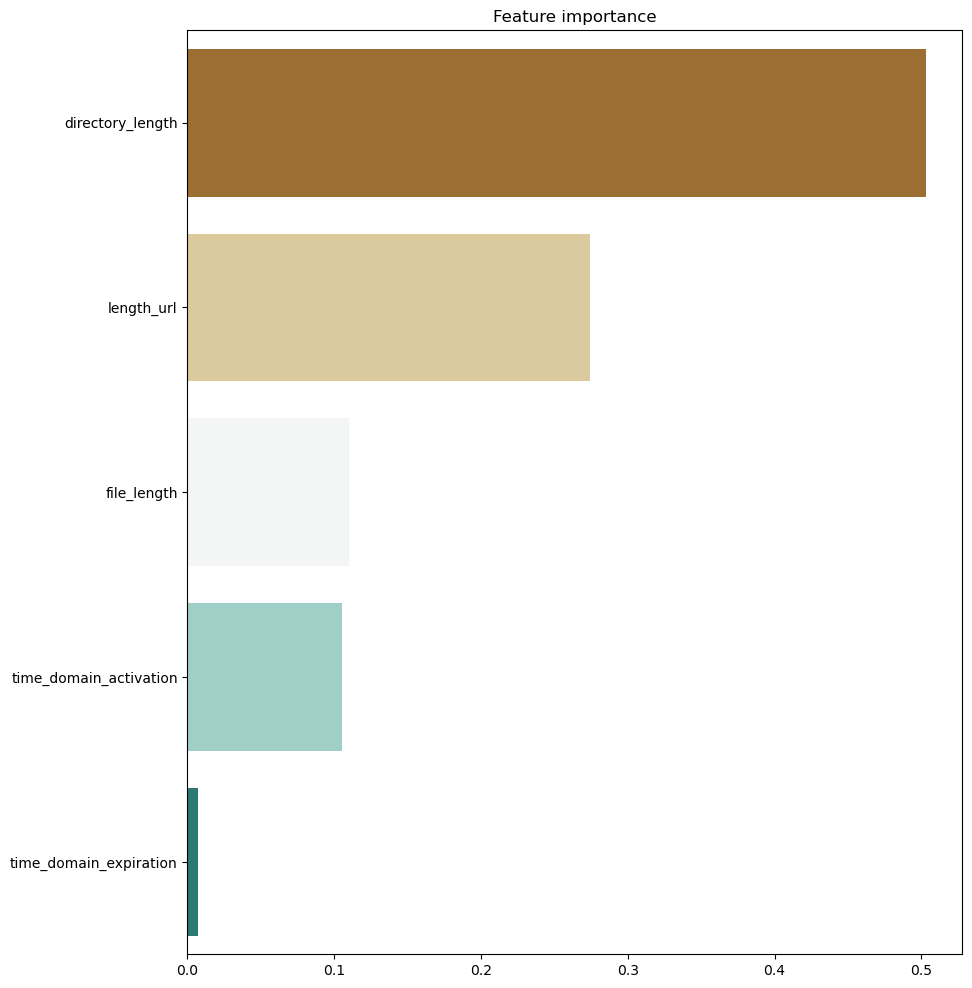

In [415]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

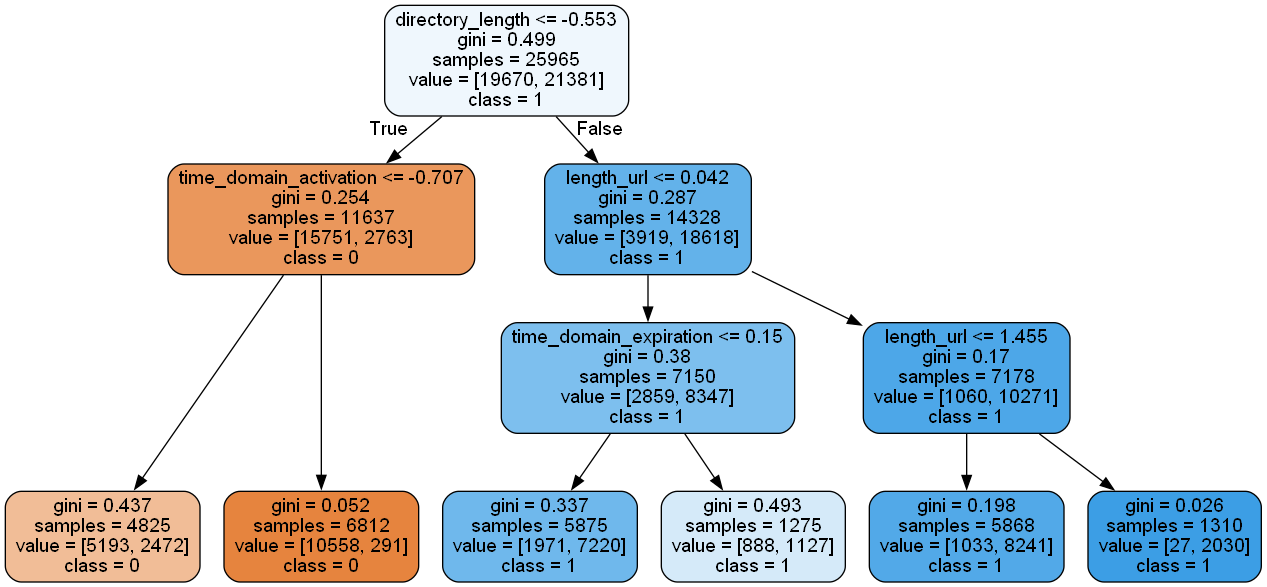

In [416]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

tree = Model.estimators_[5]  # specify the tree number   
phishing=['0', '1'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=phishing,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [417]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=Model.predict(X_train)
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          1  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          1  
4               -0.520187         1          1

In [418]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['phishing'], train['Predicted'])
print(confusion_matrix)

[[16229  3357]
 [ 2716 18749]]


In [419]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     19586
           1       0.85      0.87      0.86     21465

    accuracy                           0.85     41051
   macro avg       0.85      0.85      0.85     41051
weighted avg       0.85      0.85      0.85     41051



In [420]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=Model.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          0

In [421]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['phishing'])
print(confusion_matrix)

[[6928 1130]
 [1484 8052]]


In [422]:
from sklearn.metrics import classification_report
print(classification_report(test['phishing'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      8412
           1       0.84      0.88      0.86      9182

    accuracy                           0.85     17594
   macro avg       0.85      0.85      0.85     17594
weighted avg       0.85      0.85      0.85     17594



## 7.4 Gradient Boositng

In [423]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [5, 10, 15], # number of tress
                    'max_depth':    [10, 15],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[10000,8000,12000], ## child
                    'min_samples_split':[1000,1500,800]} #parent 

In [424]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [10, 15],
                         'min_samples_leaf': [10000, 8000, 12000],
                         'min_samples_split': [1000, 1500, 800],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy', verbose=1)

In [425]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=10,
                           min_samples_leaf=8000, min_samples_split=1000,
                           n_estimators=15)

In [426]:
final_mod_GBM

GradientBoostingClassifier(learning_rate=0.8, max_depth=10,
                           min_samples_leaf=8000, min_samples_split=1000,
                           n_estimators=15)

In [427]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [428]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=final_mod_GBM.predict(X_train)
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          1  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          1  
4               -0.520187         1          1

In [429]:
from sklearn.metrics import classification_report
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87     19586
           1       0.87      0.91      0.89     21465

    accuracy                           0.88     41051
   macro avg       0.88      0.88      0.88     41051
weighted avg       0.88      0.88      0.88     41051



In [430]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod_GBM.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          1

In [431]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      8412
           1       0.87      0.91      0.89      9182

    accuracy                           0.88     17594
   macro avg       0.88      0.88      0.88     17594
weighted avg       0.88      0.88      0.88     17594



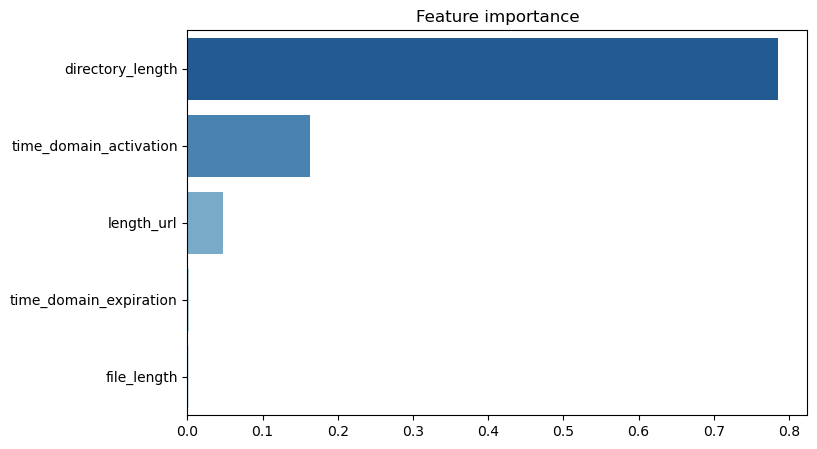

In [432]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

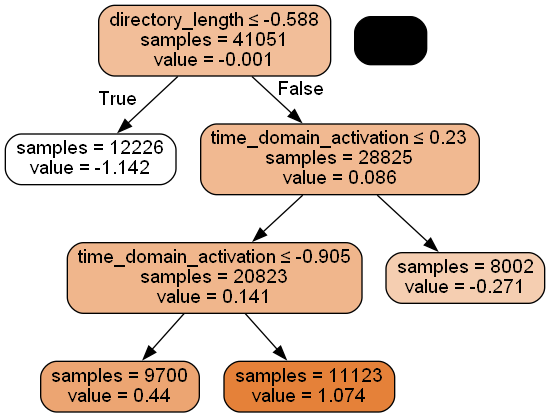

In [433]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[1, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
phishing=['1','0']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=phishing,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

## 7.5 Extreme Boosting

In [434]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [15, 20, 10],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [435]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import XGBClassifier

# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [436]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [437]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

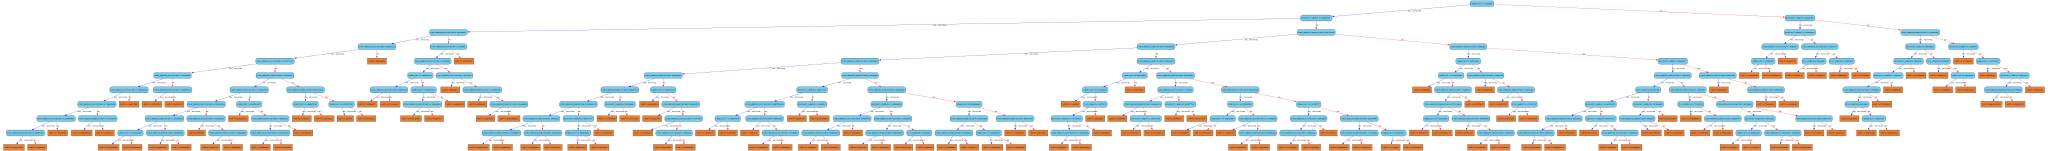

In [438]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

In [439]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          1  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          0  
4               -0.520187         1          1

In [440]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     19586
           1       0.95      0.96      0.95     21465

    accuracy                           0.95     41051
   macro avg       0.95      0.95      0.95     41051
weighted avg       0.95      0.95      0.95     41051



In [441]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          1

In [442]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      8412
           1       0.91      0.93      0.92      9182

    accuracy                           0.91     17594
   macro avg       0.91      0.91      0.91     17594
weighted avg       0.91      0.91      0.91     17594



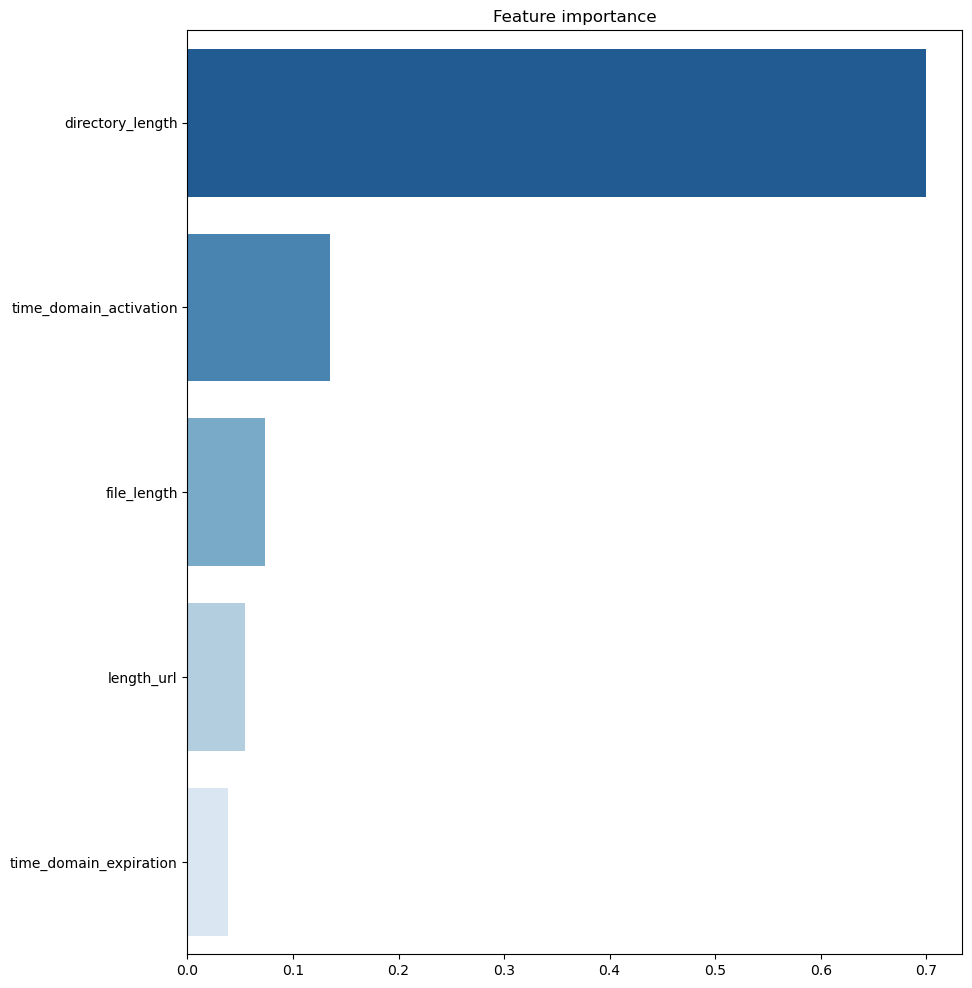

In [443]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

## 7.6 Gaussian Naive Bayes

In [444]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
output = gnb.fit(X_train, y_train)
#gnb_predictions = gnb.predict(X_test)

In [445]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=output.predict(X_train)  # answer in terms of probability
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          0  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          1  
4               -0.520187         1          1

In [446]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['phishing'])
matrix

array([[18650, 10050],
       [  936, 11415]], dtype=int64)

In [447]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     19586
           1       0.92      0.53      0.68     21465

    accuracy                           0.73     41051
   macro avg       0.79      0.74      0.72     41051
weighted avg       0.79      0.73      0.72     41051



In [448]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=output.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          0  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          0

In [449]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['phishing'])
print(matrix)

[[7962 4281]
 [ 450 4901]]


In [450]:
from sklearn.metrics import classification_report
print(classification_report(test['phishing'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77      8412
           1       0.92      0.53      0.67      9182

    accuracy                           0.73     17594
   macro avg       0.78      0.74      0.72     17594
weighted avg       0.79      0.73      0.72     17594



## 7.7 K-Nearest Neighbour

In [451]:
from sklearn.neighbors import KNeighborsClassifier
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=8)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [452]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=model.predict(X_train)
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          1  
1               -0.495421         0          0  
2                1.001131         1          0  
3               -0.010722         0          0  
4               -0.520187         1          1

In [453]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['phishing'],train['Predicted'])
print(confusion_matrix)

[[18058  1528]
 [ 2125 19340]]


In [454]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     19586
           1       0.93      0.90      0.91     21465

    accuracy                           0.91     41051
   macro avg       0.91      0.91      0.91     41051
weighted avg       0.91      0.91      0.91     41051



In [455]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=model.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          1  
4                0.014044         1          1

In [456]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['phishing'],test['Predicted'])
print(confusion_matrix)

[[7636  776]
 [1025 8157]]


In [457]:
from sklearn.metrics import classification_report
print(classification_report(test['phishing'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8412
           1       0.91      0.89      0.90      9182

    accuracy                           0.90     17594
   macro avg       0.90      0.90      0.90     17594
weighted avg       0.90      0.90      0.90     17594



In [458]:
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  95.0        Test Accuracy is  88.0 % for K-Value: 1
Train Accuracy is  92.0        Test Accuracy is  88.0 % for K-Value: 2
Train Accuracy is  93.0        Test Accuracy is  90.0 % for K-Value: 3
Train Accuracy is  92.0        Test Accuracy is  89.0 % for K-Value: 4
Train Accuracy is  92.0        Test Accuracy is  90.0 % for K-Value: 5
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 6
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 7
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 8
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 9
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 10
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 11
Train Accuracy is  91.0        Test Accuracy is  90.0 % for K-Value: 12
Train Accuracy is  90.0        Test Accuracy is  90.0 % for K-Value: 13
Train Accuracy is  90.0        Test Accuracy is  90.0 % for K-Value: 14
T

##### Best K-value is 5. Model is good-fit in test data.

## 7.8 Ridge Classifier

In [460]:
from sklearn.linear_model import RidgeClassifier,Ridge
final_mod = RidgeClassifier(alpha=2) # randomly aplha (lambda) > 0 

In [461]:
final_mod.fit(X_train, y_train)

RidgeClassifier(alpha=2)

In [462]:
print(final_mod.intercept_)    # Beta0

[0.04577233]


In [463]:
print(final_mod.coef_)  # Beta1 , Beta2 , Beta3

[[ 0.15368289  0.41024329 -0.18099483 -0.3170545  -0.00450502]]


In [464]:
list(final_mod.coef_)
coefs = pd.DataFrame(list(final_mod.coef_.ravel()),list(final_mod.feature_names_in_)).reset_index()
coefs.columns = ['feature', 'coefficient']
#coefs = coefs.sort_values(by='coefficient', ascending=False)
coefs

feature  coefficient
0              length_url     0.153683
1        directory_length     0.410243
2             file_length    -0.180995
3  time_domain_activation    -0.317054
4  time_domain_expiration    -0.004505

In [465]:
train=pd.concat([X_train,y_train],axis=1)  # Index number
train['Predicted']=final_mod.predict(X_train)
train.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Predicted  
0               -0.520187         1          1  
1               -0.495421         0          0  
2                1.001131         1          1  
3               -0.010722         0          1  
4               -0.520187         1          1

In [466]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['phishing'])
print(confusion_matrix)

[[12745  3427]
 [ 6841 18038]]


In [467]:
from sklearn.metrics import classification_report
print('Classification report for train data is : \n',
      classification_report(train['Predicted'],train['phishing']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.65      0.79      0.71     16172
           1       0.84      0.73      0.78     24879

    accuracy                           0.75     41051
   macro avg       0.75      0.76      0.75     41051
weighted avg       0.77      0.75      0.75     41051



In [468]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Predicted  
0                0.067113         1          1  
1                0.261700         0          0  
2               -0.104478         0          0  
3               -0.329137         1          0  
4                0.014044         1          1

In [469]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['phishing'])
print(confusion_matrix)

[[5405 1457]
 [3007 7725]]


In [470]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['phishing']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.64      0.79      0.71      6862
           1       0.84      0.72      0.78     10732

    accuracy                           0.75     17594
   macro avg       0.74      0.75      0.74     17594
weighted avg       0.76      0.75      0.75     17594



## 7.9 Lasso Classifier

In [471]:
from sklearn.linear_model import LassoCV
Lasso_mod = LassoCV()  #Alpha = Lambda
model=Lasso_mod.fit(X_train, y_train)

In [472]:
model.alpha_  # Lambda value 

0.0006838492576619704

In [473]:
model.intercept_ # Beta0

0.5228861659886482

In [474]:
model.coef_  # Beta1, Beta2 , Beta3

array([ 0.07656619,  0.20335719, -0.08852515, -0.15816745, -0.00175174])

In [475]:
coef2 = pd.DataFrame(list(model.coef_.ravel()),list(model.feature_names_in_)).reset_index()
coef2.columns = ['Variable', 'coefficient']
coef2 = coef2.sort_values(by='coefficient', ascending=False)
coef2

Variable  coefficient
1        directory_length     0.203357
0              length_url     0.076566
4  time_domain_expiration    -0.001752
2             file_length    -0.088525
3  time_domain_activation    -0.158167

In [476]:
train_lasso=pd.concat([X_train,y_train],axis=1)
train_lasso['Probability']=model.predict(X_train)  # 46
train_lasso['Predicted']= np.where(train_lasso['Probability'] >= 0.7,1,0)  #thershold  >0.7
train_lasso.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.532370         -0.394684     0.002905               -0.905369   
1   -0.373385         -0.605636    -0.297186               -0.519598   
2    1.410778          3.367308     3.784056                1.527131   
3    0.562859          1.398415     1.683417                0.426255   
4    0.686514         -0.465001    -0.297186               -0.905369   

   time_domain_expiration  phishing  Probability  Predicted  
0               -0.520187         1     0.545717          0  
1               -0.495421         0     0.480497          0  
2                1.001131         1     0.737390          1  
3               -0.010722         0     0.633934          0  
4               -0.520187         1     0.651308          0

In [477]:
print('Classification report for train data is : \n',
      classification_report(train_lasso['Predicted'],train_lasso['phishing']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.98      0.59      0.73     32715
           1       0.37      0.95      0.53      8336

    accuracy                           0.66     41051
   macro avg       0.67      0.77      0.63     41051
weighted avg       0.86      0.66      0.69     41051



In [478]:
test=pd.concat([X_test,y_test],axis=1)
test['Probability']=model.predict(X_test) # 46
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

length_url  directory_length  file_length  time_domain_activation  \
0   -0.073080          0.167857     0.242978               -0.372077   
1   -0.479375         -0.605636    -0.297186                1.284595   
2   -0.338055         -0.570478    -0.297186                1.750020   
3    0.386209         -0.218890    -0.297186                0.229797   
4   -0.514705         -0.570478    -0.297186               -0.883223   

   time_domain_expiration  phishing  Probability  Predicted  
0                0.067113         1     0.588649          0  
1                0.261700         0     0.185691          0  
2               -0.104478         0     0.130687          0  
3               -0.329137         1     0.498483          0  
4                0.014044         1     0.533447          0

In [479]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['phishing']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.98      0.58      0.73     14051
           1       0.36      0.94      0.53      3543

    accuracy                           0.66     17594
   macro avg       0.67      0.76      0.63     17594
weighted avg       0.85      0.66      0.69     17594



## 7.10 Support Vector Machine

In [480]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
from sklearn.svm import SVC  # supervised learning methods used for classification, regression 
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

import seaborn as sn
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from PIL import  Image
import seaborn as sns#visualization
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [481]:
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
model = SVC(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train, y_train) #Variable = fgood ( defaulter =1 , non-defaulter = 0)

SVC(kernel='linear')

In [482]:
model.support_vectors_        #####this are support vector

array([[-0.37338522, -0.60563647, -0.29718629, -0.5195985 , -0.49542087],
       [ 0.56285897,  1.39841512,  1.68341674,  0.42625467, -0.01072188],
       [ 0.28021922,  0.76555673, -0.29718629, -0.44101553, -0.2371506 ],
       ...,
       [ 0.19189429, -0.21888967,  0.30299645, -0.90536942, -0.52018651],
       [-0.05541549,  0.09753953,  0.84316091, -0.64211649,  0.11133736],
       [-0.44404516, -0.57047767, -0.29718629, -0.90072589,  0.10072351]])

In [483]:
np.round(model.coef_)                 ######### Coefficient value   ( beta's value)

array([[ 2.,  2., -1., -0., -0.]])

In [484]:
np.round(model.intercept_)   ###### bias  ( intercept`)

array([1.])

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train['Prediction']=model.predict(X_train)
train.head()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Prediction'],train['phishing'])
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['phishing'], train['Prediction']))

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test['Prediction']=model.predict(X_test)
test.head()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix( test['Prediction'],test['phishing'])
print(confusion_matrix)

In [ ]:
print(classification_report(test['phishing'], test['Prediction']))

# Step 8 : Choosing Best Model

* I have applied 10 classification algorithms on phishing domain detection dataset.
* These are the train/test accuracy of all the models and sensitivity for predicting the fake site.

        Model____________Train Accuracy________Test Accuracy_____ Sensitivity______Precision
        Logistic	            84	                83	              79           88
        Decision Tree	       84	                84	              88           83
        Random Forest	       85	                85	              88           84
        Gradient Boosting	   88                    88	              91           87
        Extreme Boosting	    95                    91	              93           91
        Naïve Bayes	         73	                73	              53           92
        KNN	                 91	                90	              89           91
        Ridge Classifier	    75	                75	              72           84
        Lasso Classifier	    66	                66	              94           36
        SVM	                 88	                88	              96           75 
        
        
        We are choosing 'Gradient Boosting' as its training and testing accuracy is good fit.
        The precision rate and Sensitivity for caputuring the phishing site is quite good.


# Step 9 : Pickling the model file for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(final_mod_GBM, open('regmodel.pkl', 'wb'))

In [307]:
pickle.dump(scaler,open('scaling.pkl','wb'))

# Step 10 : Conclusion

* We can conclude that we did Data Pre-processing, Data Exploration, Feature Selection, Feature Scaling, Model Building and pickling of model
* We have applied 10 classification model out of which we chose the best one.
* We visualize the important features for prediction.
* We solved the problem mentioned in the problem statement with the correct approach.

# FINISHED